In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Confidence Interval Tests (Review)

## 95% Confidence Interval
* Interval of **estimates of a parameter**
* Based on random sampling
* 95% is called the **confidence level**
    * Could be any % between 0 and 100
    * Higher % means wider interval but less accuracy
* The **confidence is in the process** that generated the interval
    * It generates a **good** interval about 95% of the time

Here we're going to analyze **an unfair coin** dataset

In [2]:
# bootstrap_mean function
def bootstrap_mean(sample_from_population, label, repetitions):
    #Create an array the collects the means
    resampled_means = []
    
    for i in np.arange(repetitions):
        # Create a resample from the original table of sample
        resample = sample_from_population.sample()
        # Take the mean of the column of interest
        mean = np.mean(resample.column(label))
        # Append the resulting array
        resampled_means.append(mean)
        
    return resampled_means

In [3]:
# Bootstrap with Confidence Interval
def bootstrap_ci_mean(sample_from_population, label, repetitions):
    # Use the pre-existing bootstrap_mean function
    resampled_means = bootstrap_mean(sample_from_population, label, repetitions)
    
    # Create the 95% confidence interval settings
    interval_95 = make_array(
    percentile(2.5, resampled_means),
    percentile(97.5, resampled_means)
    )
    
    Table().with_column('Resampled mean', resampled_means).hist(0)
    plt.plot(interval_95, [0, 0], color = 'gold', lw = 8)
    print('Approximate 95% Bootstrap Confidence Interval for Population Mean:')
    print(np.round(interval_95, 3))

## Flips of An Unfair Coin
Here we're going to analyze the `flips` dataset, which is the results of flipping an unfair coin.

In [4]:
# Heads is 1, Tails is 0
flips = Table.read_table('unfair_flips.csv')
flips.show(3)

Heads
1
0
0


In [5]:
# Group the flip result!
flips.group('Heads')

Heads,count
0,42
1,133


## Question: How unfair is this coin?

### Side Note: Taking the Mean for Computing the Proportion of a Value
If we take the mean of an array containing only zeroes and ones, it will give us the proportion of ones.

In [6]:
np.mean(make_array(0, 0, 1, 1))

0.5

In [7]:
np.mean(make_array(0, 0, 1))

0.3333333333333333

Now let's take the `mean` of our `flips` table.

In [8]:
np.mean(flips.column('Heads'))

0.76

This means from our `flips` table, there are about 76% heads.

If we use the `bootstrap_ci_mean` on **flips** table with 5,000 repetitions:

Approximate 95% Bootstrap Confidence Interval for Population Mean:
[0.697 0.823]


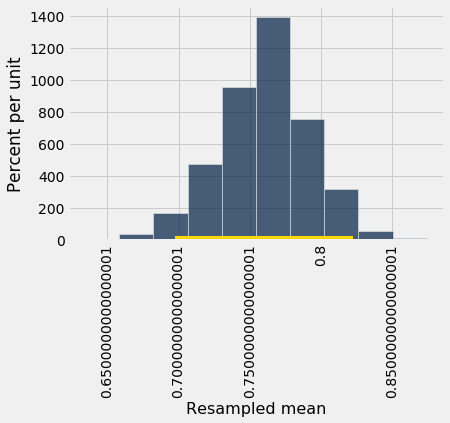

In [9]:
bootstrap_ci_mean(flips, 'Heads', 5000)

From generating the CI above, we are confidence that 95% of the time, the coin is biased between 70% to 82% to give out `Heads`. 

Recall the previous example where we analyze to see if 0 is within the confidence interval and how that was related to the P-value. In this case, we can use the confidence interval to do a hypothesis test. The test statistic would be the proportion of heads.

**Null**: The coin is fair, so there should be 50% chance of getting `Heads`

Looking at the resulting CI above, the CI does not contain 0.5. 

## Using a CI for Testing
We are testing:
* **Null hypothesis**: The population mean is some number `x`
* **Alternative hypothesis**: The population mean is NOT `x`
* When we choose a cut-off as a P-value,
    * Construct a `(100-p)%` confidence interval for the population average
        * Example: If we want a 5% cutoff, construct a 95% CI
    * If `x` is not in the interval, **reject the null**

# Average
If we have a data: 2, 3, 3, 9 ; then the `average` is simply $ \frac{2 + 3 + 3 + 9}{4} = 4.25$

Average is:
* Not necessarily a value in the collection
* Does not need to be an integer even if the data are integers
* Somewhere between `min` and `max`, but not necessarily halfway in between
* Has the same units as the data (e.g. m, kg, cm, L)
* Can think of a **smoothing operator**: collect all the contributions in one big pot, then split evenly

## Discussion Question
<img src = 'NBA.jpg' width = 700\>

From the data above, which one is greater: `mean` or `median`?

#### Answer:
The histogram above has more data points on the right hand side data points and thus, the `mean` would be greater. If the histogram has a symmetrical shape, then the `mean` would be about the same as the `median`.

## Properties of the Mean
* Can think of `Mean` as the balance point of the histogram
* `Mean` is not the "halfway point" of the data
    * `Mean` is not median
* If the distribution is symmetric about a point, then that point is both the average and the median
* If the histogram is skewed, then the mean is pulled away from the median to the direction of the tail

## Demo: Mean
Let's say we have the following values.

In [11]:
values = [3, 2, 9, 3]

The `mean` can be calculated in many ways:

In [12]:
np.average(values)

4.25

In [13]:
np.mean(values)

4.25

In [14]:
sum(values) / len(values)

4.25

Another way to think of the `mean` is as a **weighted average of however many times each element appear**. 
* 3 appears twice
* 2 and 9 appear once

In [15]:
(2/4) * 3 + (1/4) * 2 + (1/4) * 9

4.25

# Standard Deviation
Standard deviation measures how wide the variability of a value in a distribution.

## Defining Variability

1. Method #1: Take the difference between biggest value and the smallest value
    * But this method doesn't provide information about the shape of the distribution
        * We can't tell if we have a wide or narrow distribution
        
2. Method #2: Measure the variability around the `mean`
    * Need to find a way to quantify this
    
## Demo
Back to the `values`:

In [18]:
values = make_array(3, 2, 9 ,3)
values

array([3, 2, 9, 3])

We want to know how far each value in `values` from the `mean`.

In [20]:
average = np.average(values)
average

4.25

In [21]:
deviations = values - average
deviations

array([-1.25, -2.25,  4.75, -1.25])

Let's make a table out of the result above!

In [23]:
t = Table().with_column(
'Value', values,
'Deviation from Average', deviations)
t

Value,Deviation from Average
3,-1.25
2,-2.25
9,4.75
3,-1.25


On any dataset, the sum of the deviations is always 0.

In [24]:
t.column('Deviation from Average').sum()

0.0

Notice that some of the deviation are negative values! Thus we'll square them to make them positive and sum all of them.

In [25]:
deviations ** 2

array([ 1.5625,  5.0625, 22.5625,  1.5625])

In [26]:
t.with_column('Squared Deviations', deviations ** 2)

Value,Deviation from Average,Squared Deviations
3,-1.25,1.5625
2,-2.25,5.0625
9,4.75,22.5625
3,-1.25,1.5625


In statistics, `variance` is obtained by calculating the `mean` of the `Squared Deviations`.

In [28]:
variance = np.mean(deviations ** 2)
variance

7.6875

The `Standard Deviation` can be obtained by taking the square root of the `variance`.

In [30]:
standard_dev = np.sqrt(variance)
standard_dev

2.7726341266023544

`np.std` is the shortcut for calculating the standard deviation. It takes the original array as the argument.

In [31]:
np.std(values)

2.7726341266023544

# How Far from the Average?
* Standard deviation (SD) measures roughly how far the data are from the average
* SD = root mean square of deviations from average
    * What we did was the reverse of this sentence
    * Take average, deviations, square, mean, square root
* SD has the same units as the data
    * We usually write `average` plus or minus a few SDs